In [1]:
import numpy as np
import itertools

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
def pbc(data, a, b, size = (2, 2)):
    for i in range(len(data)):
        if data[i, 0] < 0:
            data[i, 0] += a[0]*size[0]
        if data[i, 1] < 0:
            data[i, 1] += b[1]*size[1]

In [32]:
def myplot(data):
    plt.scatter(data[:, 0], data[:, 1])
    plt.plot((0, a[0]), (0, a[1]), 'k')
    plt.plot((0, b[0]), (0, b[1]), 'k')
    plt.plot((b[0], b[0]+a[0]), (b[1], b[1]), 'k')
    plt.plot((b[0]+a[0], a[0]), (b[1], 0), 'k')

In [33]:
def myplot_pbc(data):
    plt.scatter(data[:, 0], data[:, 1])
    plt.plot((0, a[0]), (0, 0), 'k')
    plt.plot((0, 0), (0, b[1]), 'k')
    plt.plot((0, a[0]), (b[1], b[1]), 'k')
    plt.plot((a[0], a[0]), (0, b[1]), 'k')

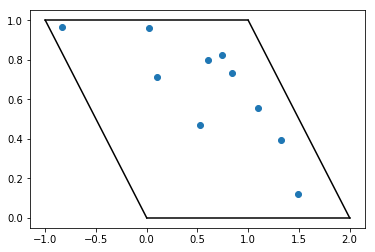

In [46]:
a = (2, 0)
b = (-1, 1)
temp = [[np.random.rand() for _ in range(2)] for i in range(10)]
data = [(a[0]*item[0]+b[0]*item[1], a[1]*item[1]+b[1]*item[1]) for item in temp]
data = np.array(data)
myplot(data)

In [47]:
def expand(data, a, b, size = (2, 2)):
    expanded = []
    for i, j in itertools.product(*(range(_) for _ in size)):
        temp = data.copy()
        temp[:, 0] += i*a[0]+j*b[0]
        temp[:, 1] += i*a[1]+j*b[1]
        expanded.append(temp)
    return expanded

In [48]:
temp = expand(data, a, b)

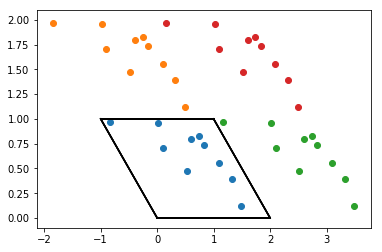

In [49]:
for i in temp:
    myplot(i)

In [50]:
def translate(data, a, b, size = (2, 2)):
    trans = []
    for i, j in itertools.product(*(range(_) for _ in size)):
        temp = data.copy()
        temp[:, 0] += i*a[0]
        temp[:, 1] += j*b[1]
        trans.append(temp)
    return trans

In [51]:
trans = translate(data, a, b)

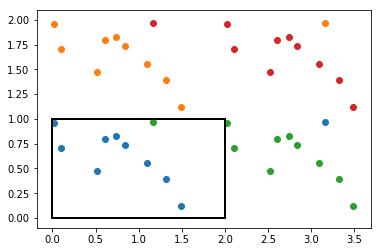

In [52]:
for i in trans:
    pbc(i, a, b)
    myplot_pbc(i)

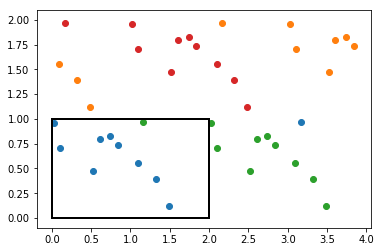

In [53]:
for i in temp:
    pbc(i, a, b)
    myplot_pbc(i)

We could see that previous 2 figures differs

# Triclinic box and when can it be converted to cubic box

For many MD simulations of 2-D materials, the initial configuration is constructed with a triclinic box, often times from the DFT calculation. But the initial structure could be quite small, containing only a couple of atoms, which is usually not big enough to have a vilid MD simulation. So, we need to expand the initial structure to a larger one, using periodic boundary conditions. One way to do this is simple expand the materials several times in x and y directioins until the desired size is reached. This will always work if we just use the material in a freestanding way, i.e., without cubic periodic boundary conditions. But often times, we will use 2-D materials as an infinite plane, with cubic periodic boundary conditions applied. Thus, we need to consider whether the expanded structure is compatable with the cubic box.

For the 2-D systems, we will just use 2 vectors to define the plane.

$v1 = [v1(x), 0]$

$v2 = [v2(x), v2(y)]$

And we assume that the initial box is expaned a and b times in x and y directions respectively.

Then the current box vectors are:

$v1' = [a \cdot v1(x), 0]$

$v2' = [b\cdot v2(x), b\cdot v2(y)]$

For any point (x, y) in this new box, it's image $[a',b']$ box way will be $[x+a'\cdot a\cdot v1(x)+b'\cdot b\cdot v2(x), y+b'\cdot b\cdot v2(y)]$.

If the triclinic box matches cubic box, then the image from triclinic box should coincide with the image form cubic box:

$x+a'\cdot a\cdot v1(x)+y\cdot b\cdot v2(x)-x = n\cdot v1(x)$

$y+b'\cdot b\cdot v2(y)-y = n\cdot v2(y)$

The second equation is already satisfied by itself.

The first equation can be transformed as:

$(a'\cdot a-n)v1(x) = -b'\cdot b\cdot v2(x)$

Then,
$a'\cdot a-n = -\frac{v2(x)}{v1(x)}b'\cdot b$ should be true for all $a'$ and $b'$, and n could be any integer

when $a'=b'=1$

we have
$a-n = -\frac{v2(x)}{v1(x)}b$

If this satisfies, then the left hand side could be:

$a'\cdot a-n = a+\big((a'-1)a-n\big) = a-n$

Similary, right hand side is:

$-\frac{v2(x)}{v1(x)}b'\cdot b = -\frac{v2(x)}{v1(x)}(b'-1)-\frac{v2(x)}{v1(x)}b$

Since the first and third term are both integers, the second term is also integer. Move the second term to the left hand side and combine it with n. Then if we have 

$a-n = -\frac{v2(x)}{v1(x)}b$, where $n$ could be any integer

i.e. $\frac{v2(x)}{v1(x)}$ is rational number

the triclinic box will coincide with the cubic box!